In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt

df = pd.read_csv('health_data.csv')

print(df.head())

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0


In [2]:
#randomize indces, take the first 80% of the indices and last 20 percent as test
indices = np.random.permutation(df.shape[0])
train_ind, test_ind = indices[:int(0.7*df.shape[0])], indices[int(0.7*df.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df.loc[train_ind, :], df.loc[test_ind, :]
train_df, test_df = train_df.reset_index(), test_df.reset_index()

#print('Train data is : \n', train_df.head(), ' \nnumber of rows = {}'.format(train_df.shape[0]))
#print('Test data is : \n', test_df.head(), ' \nnumber of rows = {}'.format(test_df.shape[0]))

In [3]:
x_train = train_df.iloc[:,1:4]
y_train = train_df.iloc[:,4]

x_test = test_df.iloc[:,1:4]
y_test = test_df.iloc[:,4]

x_train['ones'] = 1
x_test['ones'] = 1

for col in ['age', 'restbps', 'chol']:
    x_train[col] = (x_train[col]-x_train[col].mean())/(x_train[col].std())
    x_test[col] = (x_test[col]-x_test[col].mean())/(x_test[col].std())
    
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

        age   restbps      chol  ones
0  0.207350  0.786750 -0.509219     1
1  0.896635  1.283236 -0.140673     1
2 -0.413008  0.400595 -0.435510     1
3  1.654850  0.621255  2.512860     1
4  0.965564  1.007411  0.946538     1
0    0
1    1
2    1
3    1
4    1
Name: category, dtype: int64
        age   restbps      chol  ones
0  0.930782  1.029056  0.920134     1
1 -1.036560 -1.000204 -0.408571     1
2 -1.240079 -1.213810  0.518026     1
3 -1.375757 -1.053605  0.238299     1
4  0.795104  0.922253  0.710339     1
0    1
1    0
2    0
3    0
4    1
Name: category, dtype: int64


In [4]:
X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
print(X_train.shape)
print(X_test.shape)

#print(W.shape)
Y_train = y_train.to_numpy()
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = y_test.to_numpy()
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))
print(Y_train.shape)
print(Y_test.shape)

(489, 4)
(211, 4)
(489, 1)
(211, 1)


In [5]:
def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

def predict(W,X,threshold):
    Z = sigmoid(np.matmul(X,W))
    Z[Z>threshold] = 1
    Z[Z<=threshold] = 0
    return Z

In [6]:
num_iter = 1000
rate = 0.001
W_init = np.random.random((X_train.shape[1],1))

In [7]:
def loss(W,X,Y):
    eps = 1e-14
    mean = sigmoid(np.matmul(X,W)) #assuming that the function will calc sigmoid elementwise
    #mean shape = (489,1)
    #y shape = (489,1)
    logloss = -(np.mean(np.multiply(Y,np.log(mean + eps))) + np.mean(np.multiply(1-Y,np.log(1-mean + eps))))
    return logloss

def gradient(W,X,Y):
    mean = sigmoid(np.matmul(X,W))
    return np.matmul(X.T,(Y - mean))


def sgd(W,X,Y,X_test,Y_test,rate,num_iter):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradient(W,X,Y)
        W = W + rate*grad
        train_loss.append(loss(W,X,Y))
        test_loss.append(loss(W,X_test,Y_test))
    return W, train_loss, test_loss



[[ 2.63424814]
 [ 1.02270053]
 [ 0.58488235]
 [-0.46491939]]


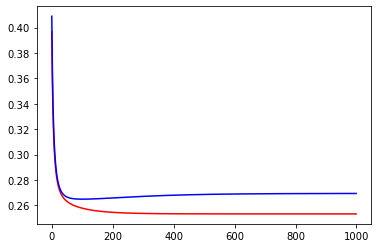

In [8]:
W = np.copy(W_init)

W, train_loss, test_loss = sgd(W,X_train,Y_train,X_test,Y_test,rate,num_iter)

print(W)

plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()

In [9]:
def gradientL2(W,X,Y,lam):
    mean = sigmoid(np.matmul(X,W))
    return (np.matmul(X.T,(Y - mean)) - 2*lam*W)

def lossL2(W,X,Y,lam):
    mean = sigmoid(np.matmul(X,W))
    logloss = -(np.mean(np.multiply(Y,np.log(mean))) + np.mean(np.multiply(1-Y,np.log(1-mean)))) + lam*np.mean(np.multiply(W,W))
    return logloss

def sgdL2(W,X,Y,X_test,Y_test,rate,num_iter,lam):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradientL2(W,X,Y,lam)
        W = W + rate*grad
        train_loss.append(lossL2(W,X,Y,lam))
        test_loss.append(lossL2(W,X_test,Y_test,lam))
    return W, train_loss, test_loss                                                                                                                                                                                                                

[[ 2.63414834]
 [ 1.02250537]
 [ 0.58483772]
 [-0.46486318]]


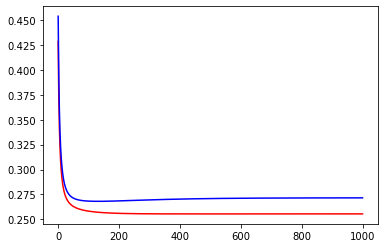

In [10]:
W2 = np.random.random((X_train.shape[1],1))
lam2 = 0.001
W2, train_loss_L2, test_loss_L2 = sgdL2(W2,X_train,Y_train,X_test,Y_test,rate,num_iter,lam2)
print(W2)
plt.plot(train_loss_L2, 'r')
plt.plot(test_loss_L2, 'b')
plt.show()

In [11]:
def loss_generic(W,X,Y,loss_fn,*args):
    eps = 1e-14
    lam1 = args[0]
    lam2 = args[1]
    mean = sigmoid(np.matmul(X,W))
    if(loss_fn == 1):
        logloss = -(np.mean(np.multiply(Y,np.log(mean))) + np.mean(np.multiply(1-Y,np.log(1-mean)))) + lam2*np.sum(np.multiply(W,W)) + lam1*np.sum(np.abs(W))
        return logloss
    elif(loss_fn == 2):
        square_loss = square_loss = np.mean((np.matmul(X,W) - Y)**2) + lam1*np.sum(np.multiply(W,W)) + lam2*np.sum(np.abs(W))
        return square_loss

In [12]:
def grad_generic(W,X,Y,loss_fn,*args):
    lam1 = args[0]
    lam2 = args[1]
    W_grad = np.zeros(W.shape)
    mean = sigmoid(np.matmul(X,W))
    for i in range(W_grad.shape[0]):
        if(W[i] > 0):
            W_grad = 1
        else:
            W_grad = -1

    if(loss_fn == 1):
        grad = np.matmul(X.T,(Y-mean)) - 2*lam2*W - lam1*W_grad
        return grad
    elif(loss_fn == 2):
        grad = -2*np.matmul(X.T,(np.matmul(X,W) - Y))/X.shape[0] - 2*lam2*W - lam1*W
        return grad

In [13]:
def sgd_generic(W,X,Y,X_test,Y_test,rate,num_iter,loss_fn,*args):
    lam1 = args[0]
    lam2 = args[1]
    train_loss, test_loss = [], []
    for _ in range(num_iter):
        grad = grad_generic(W,X,Y,loss_fn, lam1,lam2)
        W = W + rate*grad
        train_loss.append(loss_generic(W,X,Y,loss_fn,lam1,lam2))
        test_loss.append(loss_generic(W,X_test,Y_test,loss_fn,lam1,lam2))
        
        plt.plot(train_loss, 'r')
        plt.plot(test_loss, 'b')
   
    
    return W, train_loss, test_loss
    

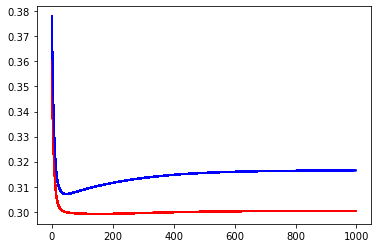

In [14]:
w = np.random.random((X_train.shape[1],1))

lam1 = 0
lam2 = 0

w, train_loss_gen, test_loss_gen = sgd_generic(w,X_train,Y_train,X_test,Y_test,rate,num_iter,1,0.01,0)

plt.plot(train_loss_gen, 'r')
plt.plot(test_loss_gen,'b')

plt.show()

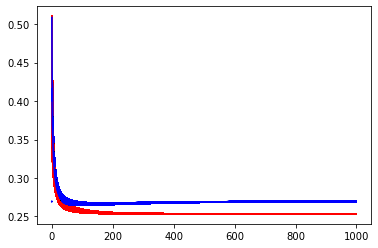

In [15]:
def performance_metrics(y_pred_test, y_test):
    '''gives the TPR, FPR, acc, precision, recall and F1 score by comparing the 2 input arrays'''
    #for precision, recall, class 1 will be positive class (ie the person ahs a health condition) 
    #and 0 as negative class (no health condition)
    TP = np.logical_and(y_pred_test==y_test,y_pred_test == 1).sum()
    FP = np.logical_and(y_pred_test!=y_test,y_pred_test == 1).sum()
    TN = np.logical_and(y_pred_test==y_test,y_pred_test == 0).sum()
    FN = np.logical_and(y_pred_test!=y_test,y_pred_test == 0).sum()
    ACC = (TP+TN)/(TP+TN+FP+FN)
    P = (TP)/(TP+FP)
    R = (TP)/(TP+FN)
    F1 = 2*P*R/(P+R)
    TPR = R
    FPR = FP/(FP+TN)
    
    # return {'accuracy':ACC, 'precision':P, 'recall':R, 'F1':F1, 'TPR':TPR, 'FPR': FPR}
    return [ACC, P, R, F1, TPR, FPR]

intervals = 11

threshold = np.linspace(0,0.1,intervals)
losses = []

for i in range(intervals):
    W00 = np.random.random((X_train.shape[1],1))
    W00, l1, l2 = sgd_generic(W00,X_train,Y_train,X_test,Y_test,rate,num_iter,1,0,0)
    losses.append(l2[-1])

plt.plot(threshold,losses,'b')